## Power Flow Analysis For Various Load Demands

#### Using PSS/E scale bus load activity

Load flow analysis for various demands were conducted by making use of the SCAL activity of PSS/E. The load flow cases considered and corresponding Gen MW are tabulated in the table below:

| | Load MW | Gen MW | 
| --- | --- | --- |
| 1 | 3200 | 3258.6 |
| 2 | 3264 | 3324.8 |
| 3 | 3329.3 | 3392.7 |
| 4 | 3395.9 | 3462.4 |
| 5 | 3463.8 | 3534.1|
| 6 | 3533.1 | 3607.9 |
| 7 | 3603.7 | 3684.0 |
| 8 | 3675.7 | 3762.5 |
| 9 | 3749.3 | 3843.7 |

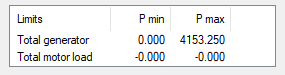

Maximum Generating capacity of the system is 4153.25 MW. Load flow analysis is carried out for load MW ranging from 3200 MW to 3749.3 MW. 

Network results obtained using LOUT activity were saved into a csv file for further analysis. The analysis of the LOUT results were carried out separately and the combined results were saved as a csv file 'Load Flow.csv' for completing the analysis.

In [19]:
import pandas as pd
import altair as alt

In [20]:
data_load_flow = pd.read_csv('Load Flow.csv')

In [21]:
data_load_flow = data_load_flow.drop(columns = ['Unnamed: 0'])

In [22]:
data_analysis = data_load_flow.assign(Load = data_load_flow['Load Flow Case'].str.split(',', expand=True)[0])

In [27]:
data_analysis.head()

,Bus Name,Area Number,Zone Number,Volt (PU),Volt (KV),Angle (Deg),Gen MW,Gen MVAR,Load MW,Load MVAR,...,Shunt MVAR,To Bus Name,MW,MVAR,Transformer Ratio,Transformer Angle (Deg),Percent,Rating,Load Flow Case,Load
0,101 NUC-A 21.600,1,77,1.0200,22.0320,16.5463,750.0,81.3072,0.0,0.0,...,-0.0000,NaN,0.0000,0.0000,NaN,0.0,0,NaN,"Load-MW = 3200, Gen-MW = 3258.64, Reactors-Mva...",Load-MW = 3200
1,101 NUC-A 21.600,0,0,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,...,0.0000,151 NUCPANT 500.00 1 1,750.0001,81.3072,1.000UN,0.0,60,1250.0,"Load-MW = 3200, Gen-MW = 3258.64, Reactors-Mva...",Load-MW = 3200
2,102 NUC-B 21.600,1,77,1.0200,22.0320,16.5463,750.0,81.3072,0.0,0.0,...,-0.0000,NaN,0.0000,0.0000,NaN,0.0,0,NaN,"Load-MW = 3200, Gen-MW = 3258.64, Reactors-Mva...",Load-MW = 3200
3,102 NUC-B 21.600,0,0,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,...,0.0000,151 NUCPANT 500.00 1 1,750.0001,81.3072,1.000UN,0.0,60,1250.0,"Load-MW = 3200, Gen-MW = 3258.64, Reactors-Mva...",Load-MW = 3200
4,151 NUCPANT 500.00,1,1,1.0119,505.9414,10.8884,0.0,0.0000,0.0,0.0,...,614.3441,NaN,0.0000,0.0000,NaN,0.0,0,NaN,"Load-MW = 3200, Gen-MW = 3258.64, Reactors-Mva...",Load-MW = 3200



All the bus names are given in the following list.


In [56]:
Bus_Name = list(data_analysis['Bus Name'].unique())


A function is defined to get MW flow from the chosen bus


In [38]:
def display_MW_from_bus(df, bus_name):
    df_ans = df[(df['Bus Name'] == bus_name) & (~df['To Bus Name'].isnull())]
    chart = alt.Chart(df_ans, title = bus_name).mark_bar().encode(
        alt.Y('Load', title=''),
        alt.X('MW', title=''),
        alt.Color('Load'),
        tooltip = ['Bus Name', 'To Bus Name','MW']).properties(width=300, height=300).facet('To Bus Name', columns=1).resolve_scale(x='independent')  
    return chart


For example the MW flow from the bus '151     NUCPANT     500.00' is plotted using the function as shown below. Hover over the bar charts to get the flow value 


In [43]:
display_MW_from_bus(data_analysis,  '151     NUCPANT     500.00')

alt.FacetChart(...)

Similar to real power flow, reactive power flow can also plotted using another function by choosing the desired bus

In [41]:
def display_MVAR_from_bus(df, bus_name):
    df_ans = df[(df['Bus Name'] == bus_name) & (~df['To Bus Name'].isnull())]
    chart = alt.Chart(df_ans, title = bus_name).mark_bar().encode(
        alt.Y('Load', title=''),
        alt.X('MVAR', title=''),
        alt.Color('Load'),
        tooltip = ['Bus Name', 'To Bus Name','MVAR']).properties(width=300, height=300).facet('To Bus Name', columns=1).resolve_scale(x='independent')  
    return chart


For example the MVAR flow from the bus '3002     E. MINE     500.00' is plotted using the function as shown below. Hover over the bar charts to get the flow value 


In [42]:
display_MVAR_from_bus(data_analysis,'3002     E. MINE     500.00')

alt.FacetChart(...)

For each load flow case, a function can be defined to obtain the variation in Gen MW, Gen MVAR, Load MW, Load MVAR, Shunt MVAR etc., at their respective buses. 


In [49]:
def plot_load_flow(df, X, Y, col, field):
    df_fil = df[df[Y] != 0]
    line = alt.Chart(df_fil).mark_line().encode(
            x = X,
            y = Y,  
            color = col).properties(height = 600, width = 500)
    point = alt.Chart(df_fil).mark_circle().encode(
            x = X,
            y = Y,  
            color = col).properties(height = 600, width = 500)
    values = sorted(df_fil[field].unique())
    dropdown = alt.binding_select(name='Load Flow Case: ', options = values)
    select_case = alt.selection_single(fields=[field], bind=dropdown)

    plot = (line + point).add_selection(select_case).encode(
            opacity=alt.condition(select_case, alt.value(0.7), alt.value(0.05))).properties(title = (str(Y)))
    return plot


For example the Gen MVAR is plotted as shown. The plot shows all the load flow cases combined. To examine each of the load flow case separately, the dropdown option can be used 


In [51]:
plot_load_flow(data_analysis, 'Bus Name', 'Gen MVAR', 'Load', 'Load Flow Case')

<ipython-input-49-e811b9edd3ad>:13: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use selection_point instead.
  select_case = alt.selection_single(fields=[field], bind=dropdown)
<ipython-input-49-e811b9edd3ad>:15: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use add_params instead.
  plot = (line + point).add_selection(select_case).encode(


alt.LayerChart(...)

#### Conclusion

Similar to the above analysis, various information can be extracted from the LOUT activity based on the question to be answered.  